In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('./carros.csv')
df.head()

,kms,precio
0,6048,1385956
1,11825,1297582
2,20000,1000000
3,21048,1284844
4,21549,685300


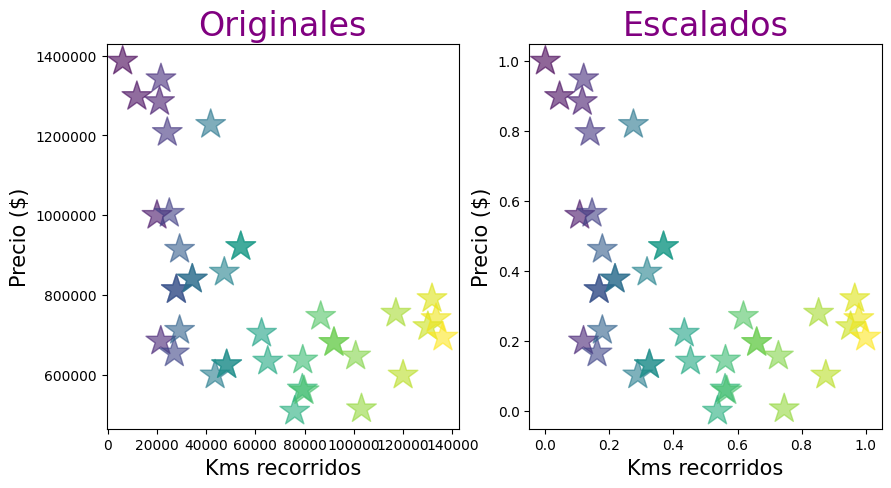

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)

ax.scatter(df['kms'],df['precio'],marker='*',s=500,c=range(df['kms'].size),alpha=0.6)

ax.set_title('Originales',size=24, color='purple')
ax.set_ylabel('Precio ($)',size=15)
ax.set_xlabel('Kms recorridos',size=15)
ax.ticklabel_format(style='plain')

# Escalamos los datos

escala_kms = preprocessing.MinMaxScaler()
escala_precio = preprocessing.MinMaxScaler()
kms = escala_kms.fit_transform(df['kms'].values.reshape(-1,1))
precio = escala_precio.fit_transform(df['precio'].values.reshape(-1,1))

# Graficamos datos escalados
ax = fig.add_subplot(1,2,2)

ax.scatter(kms,precio,marker='*',s=500,c=range(df['kms'].size),alpha=0.6)

ax.set_title('Escalados',size=24, color='purple')
ax.set_ylabel('Precio ($)',size=15)
ax.set_xlabel('Kms recorridos',size=15)
ax.ticklabel_format(style='plain');

In [5]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(kms,precio)

kms_instancia = escala_kms.transform([[20000]]) # Puede ser lista de instancias de 1 a mas
precio_instancia = knn.predict(kms_instancia)
escala_precio.inverse_transform(precio_instancia)

array([[990048.]])

### Precios de carros de 0 a 140,000 kms

In [6]:
kms_instancias = escala_kms.transform(np.arange(140000).reshape(-1,1))
precio_instancias = knn.predict(kms_instancias)
todas = escala_precio.inverse_transform(precio_instancias).reshape(1,-1)

In [9]:
todas.shape

(1, 140000)

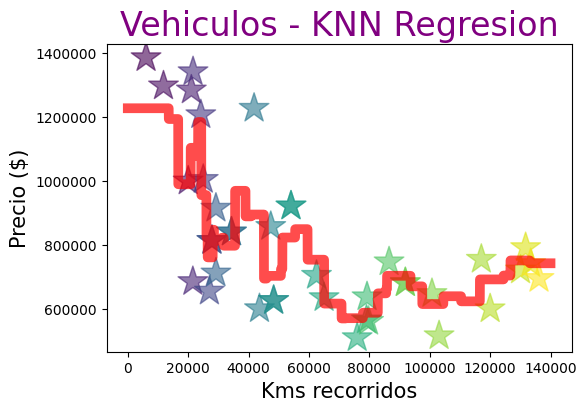

In [8]:
fig = plt.figure(figsize=(6,4))
plt.plot(np.arange(140000),todas.reshape(1,-1)[0],linewidth=7,color='red',alpha=0.7)
plt.scatter(df['kms'],df['precio'],marker='*',s=500,c=range(df['kms'].size),alpha=0.6)

plt.title('Vehiculos - KNN Regresion',size=24, color='purple')
plt.ylabel('Precio ($)',size=15)
plt.xlabel('Kms recorridos',size=15)
plt.ticklabel_format(style='plain');